In [1]:
import numpy as np
from scipy import linalg
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

mu = [0, 0]
sigma = [[5, 4], [4, 5]]
n = 1000
x = np.random.multivariate_normal(mu, sigma, size=n).T
print(x.shape)

(2, 1000)


In [3]:
# denote extreme values
set1 = np.argsort(np.linalg.norm(x, axis=0))[-20:]
set2 = list(set(range(n)) - set(set1))

<IPython.core.display.Javascript object>


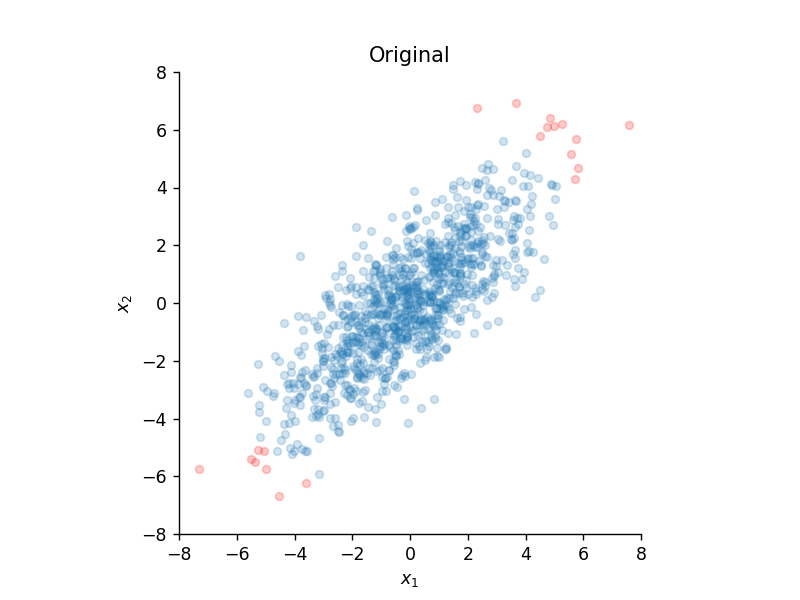

Text(0.5, 1.0, 'Original')

In [4]:
fig, ax = plt.subplots()
ax.scatter(x[0, set1], x[1, set1], s=20, c="red", alpha=0.2)
ax.scatter(x[0, set2], x[1, set2], s=20, alpha=0.2)
ax.set_aspect("equal")
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Original")

In [10]:
# Pearson correlation
np.corrcoef(x)[0, 1]

0.7797032317238085

## Calc covar matrix

In [6]:
# calc covar matrix
covar_matrix = np.cov(x[0], x[1])
# Calc EigenVect and EigenVals
evals, evecs = linalg.eigh(covar_matrix)

## Principal Component Analysis

In [7]:
# get Withening matrix ('@' is numpy operator for matrix multiplication np.dot)
# and transform data
"""
Wpca = EigenVals ** (-1/2)
z = Wpca . x = (EigenVals ** (-1/2)) . EigenVectT . x
"""
Zpca = np.sqrt(np.linalg.inv(np.diag(evals))) @ evecs.T @ x

<IPython.core.display.Javascript object>


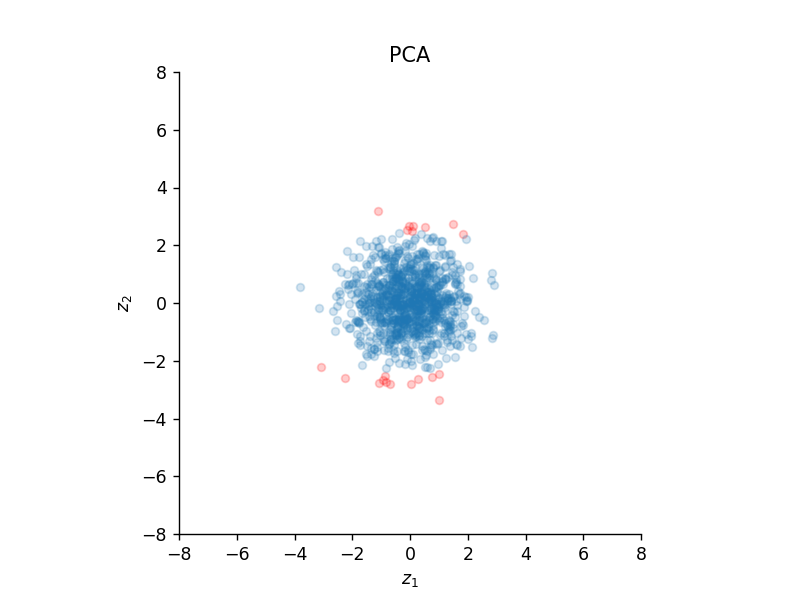

Text(0.5, 1.0, 'PCA')

In [8]:
fig, ax = plt.subplots()
ax.scatter(Zpca[0, set1], Zpca[1, set1], s=20, c="red", alpha=0.2)
ax.scatter(Zpca[0, set2], Zpca[1, set2], s=20, alpha=0.2)
ax.set_aspect("equal")
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("PCA")

In [11]:
np.corrcoef(Zpca)[0, 1]

2.9738612862441256e-17

## Zero-Phase Component Analysis

In [12]:
"""
Wzca = EigenVals ** (-1/2)
z = EigenVect . Wzca . x = EigenVect . (EigenVals ** (-1/2)) . EigenVectT . x
"""
Zpca = evecs @ np.sqrt(np.linalg.inv(np.diag(evals))) @ evecs.T @ x

<IPython.core.display.Javascript object>


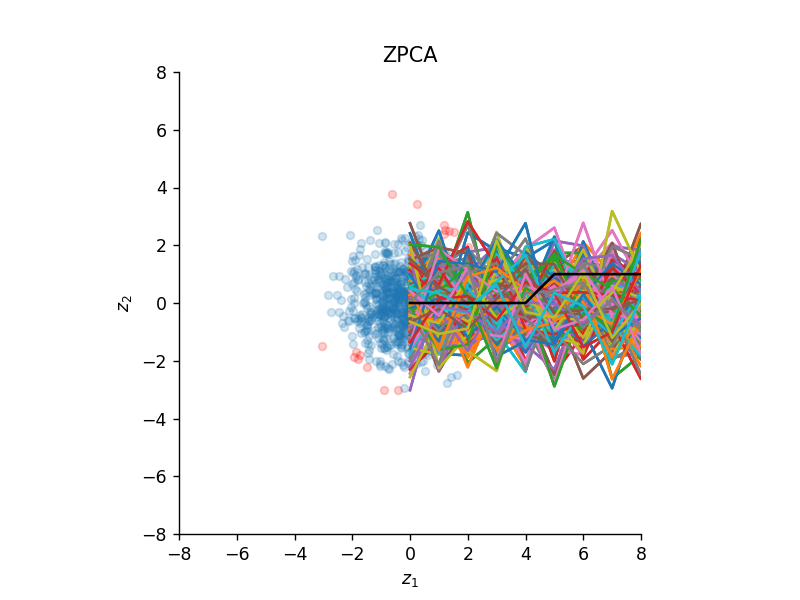

Text(0.5, 1.0, 'ZPCA')

In [13]:
fig, ax = plt.subplots()
ax.scatter(Zpca[0, set1], Zpca[1, set1], s=20, c="red", alpha=0.2)
ax.scatter(Zpca[0, set2], Zpca[1, set2], s=20, alpha=0.2)
ax.set_aspect("equal")
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("ZPCA")

In [14]:
np.corrcoef(Zpca)[0, 1]

3.751864795930461e-16

## Common Spacial Patterns

https://github.com/mne-tools/mne-python/blob/main/mne/decoding/csp.py

https://sci-hub.do/https://doi.org/10.1016/B978-0-12-375027-3.00010-7

https://sci-hub.do/10.1109/MSP.2008.4408441

Spatial Filtering: CommonSpatial Patterns

The method of common spatial patterns (CSP) designs spatial filters in such away that the variances in the filtered time series data are optimal (in the leastsquares sense) for discrimination (Koles,1991;Müller-Gerking et al.,1999;Guger et al.,2000;Ramoser et al.,2000).

We are given input data $\{S^{i}_{c}\}^{K}_{i=1}$ denoting EEG/ECoG data from trial i for class c ∈ {1, 2}(e.g., hand versus foot motor imagery). Each $S^{i}_{c}$ is an N × T matrix, where N is the number of EEG channels and T the number of samples in time per channel. We assume that the $S^{i}_{c}$ are centered and scaled.

The goal of CSP is to find M spatial filters, given by an N × M matrix $W$ (each column is a spatial filter), that linearly transform the input signals according to 

<center>$s_{CSP}(t) = W^{T}s(t)$</center>

where $s(t)$ is the vector of input signals at time $t$ from all the channels. In order to find the filters, the class-conditional covariances are first estimated as 

<center>$R_{c} = \frac {1}{K} \sum \limits_{i} S^{i}_{c}(S^{i}_{c})^{T}$</center>

for c ∈{1, 2}. The CSP technique involves determining a matrix $W$ such that

<center>$W^{T}R_{1}W=\Lambda_{1}$</center>
<center>$W^{T}R_{2}W=\Lambda_{2}$</center>

where the $\Lambda _{i}$ are diagonal matrices and $\Lambda _{1}$+$\Lambda _{2}$ = I (I is the identity matrix). This can be done by solving a generalized eigenvalue problem given by

<center>$R_{1}w = \lambda R_{2}w$</center>

The  generalized  eigenvectors $w_{j}$ that  satisfy  the  above  equation  form  the columns of $W$ and represent the CSP spatial filters. The generalized eigenvalues $\lambda ^{j}_{1} = w^{T}_{j}R_{1}w_{j}$ and $\lambda ^{j}_{2} = w^{T}_{j}R_{2}w_{j}$ form  the diagonal elements of $\Lambda1$ and $\Lambda2$, respectively. Since $\lambda ^{j}_{1} + \lambda ^{j}_{2} = 1$, a high value for $\lambda ^{j}_{1}$ means that the filter  output  based  on  filter $w_{j}$ yields  a  high variance  for  input signals  in class  1  and  a  low  variance  for  signals  in  class  2  (and  vice  versa);  spatial filtering with such filters can thus significantly enhance discrimination ability. Typically,  a  small  number of  eigenvectors  (e.g.,  six) are  used  as  CSP filters  in BCI  applications. A  more  detailed overview  of  the  CSP  method can be found in Blankertz et al.(2008), and various enhancements to boost robustness and applicability are given in Lemm et al.(2005),Dornhege et al.(2006), andGrosse-Wentrup and Buss(2008). Although CSP has not been extensively studied in the context of ECoG,  there have been some reports of poor generalization performance for CSP when applied to ECoG signals (Hill et al.,2006).

## CSP implem

In [21]:
x = np.random.normal(loc=0, scale=1, size=(10, 64, 100))
y = np.array([0] * 5 + [1] * 5)

x.shape, y.shape

((10, 64, 100), (10,))

<IPython.core.display.Javascript object>


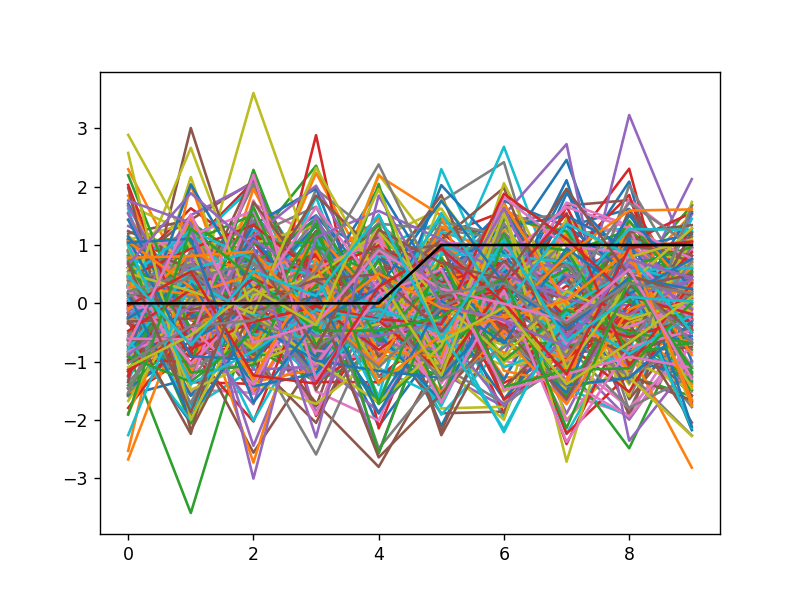

In [22]:
fig = plt.figure()

plt.plot(x[:, 0, :])
plt.plot(x[:, 1, :])
plt.plot(y, c="black")

fig.show()

In [43]:
n_components = 4

def calc_covar(x, ddof=1):
    x -= np.average(x, axis=1)[:, None] # normalisation
    return np.squeeze(np.dot(x, x.T) / (x.shape[1] - ddof)) # actual cov calc

def compute_cov_matrix(x, y):
    _, n_channels, _ = x.shape
    classes = np.unique(y)
    covs = []
    for this_class in classes:
        x_class = x[y == this_class]
        x_class = np.transpose(x_class, [1, 0, 2])
        x_class = x_class.reshape(n_channels, -1)
        # calc covar matrix for class
        covar_matrix = calc_covar(x_class)
        #_cov = np.cov(x_class)
        #print(_cov, covar_matrix)
        covs.append(covar_matrix)
    return np.stack(covs)

def compute_eigh(covs):
    
    return eigval, eigvec

covs = compute_cov_matrix(x, y)
print("covs shape: ", covs.shape)
# general eigh decomposition
eigval, eigvec = linalg.eigh(covs[0], covs.sum(0))
print("eigh vals", eigval.shape, "eigh vects", eigvec.shape)
# sort components
ix = np.argsort(np.abs(eigval - 0.5))[::-1]
print("ix: ", ix)
# apply sort to eigvec
eigvec = eigvec[:, ix]
# get filters
filters_ = eigvec.T
# apply filters
pick_filters = filters_[:n_components]
out = np.asarray([np.dot(pick_filters, epoch) for epoch in x])
print("output shape: ", out.shape)
# compute features (mean power)
out = (out ** 2).mean(axis=2)
print("output mean power shape: ", out.shape)

covs shape:  (2, 64, 64)
eigh vals (64,) eigh vects (64, 64)
ix:  [63  0  1 62 61 60  2  3 59  4  5 58 57  6 56  7  8 55 54  9 10 53 11 52
 12 13 51 14 50 49 15 48 16 47 46 17 45 18 44 19 43 42 20 21 41 40 22 39
 23 38 24 25 26 37 27 36 35 28 34 29 33 30 32 31]
output shape:  (10, 4, 100)
output mean power shape:  (10, 4)
